In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [6]:
# -----------------------------
# Step 1: Load the dataset
# -----------------------------
file_path = "HDR25_Statistical_Annex_HDI_Table.xlsx"
df = pd.read_excel(file_path)

In [7]:
df.columns

Index(['Unnamed: 0', 'Country', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita',
       'GNI per capita rank minus HDI rank', 'HDI rank'],
      dtype='object')

In [8]:
# Keep only relevant variables
data = df[['Country', 'Human Development Index (HDI) ',
       'Life expectancy at birth', 'Expected years of schooling',
       'Mean years of schooling', 'Gross national income (GNI) per capita']]
data

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,Iceland,0.972,82.691,18.850590,13.908926,69116.93736
1,Norway,0.97,83.308,18.792850,13.117962,112710.0211
2,Switzerland,0.97,83.954,16.667530,13.949121,81948.90177
3,Denmark,0.962,81.933,18.704010,13.027321,76007.85669
4,Germany,0.959,81.378,17.309219,14.296372,64053.22124
...,...,...,...,...,...,...
266,Column 2: UNDESA 2024a.,NaN,NaN,NaN,NaN,NaN
267,Column 3: ICF Macro Demographic and Health Sur...,NaN,NaN,NaN,NaN,NaN
268,"Column 4: Barro and Lee 2018, Eurostat 2024, I...",NaN,NaN,NaN,NaN,NaN
269,"Column 5: IMF 2024, United Nations Statistics ...",NaN,NaN,NaN,NaN,NaN


In [9]:
# Convert to numeric and drop missing values
for col in data.columns[1:]:
    data[col] = pd.to_numeric(data[col], errors='coerce')

data = data.dropna()

C:\Users\IIMKP\AppData\Local\Temp\ipykernel_29184\3927126214.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data[col] = pd.to_numeric(data[col], errors='coerce')


In [10]:
data

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,Iceland,0.972,82.691000,18.850590,13.908926,69116.937360
1,Norway,0.970,83.308000,18.792850,13.117962,112710.021100
2,Switzerland,0.970,83.954000,16.667530,13.949121,81948.901770
3,Denmark,0.962,81.933000,18.704010,13.027321,76007.856690
4,Germany,0.959,81.378000,17.309219,14.296372,64053.221240
...,...,...,...,...,...,...
214,Sub-Saharan Africa,0.568,62.506277,10.345610,6.163414,4351.554920
216,Least developed countries,0.560,66.516100,10.170741,5.051676,3637.195381
217,Small island developing states,0.739,71.862891,12.613779,8.604208,19343.121717
219,Organisation for Economic Co-operation and Dev...,0.916,80.570299,16.504431,12.347758,52697.597734


In [11]:
data = data[:-1]

In [12]:
data

,Country,Human Development Index (HDI),Life expectancy at birth,Expected years of schooling,Mean years of schooling,Gross national income (GNI) per capita
0,Iceland,0.972,82.691000,18.850590,13.908926,69116.937360
1,Norway,0.970,83.308000,18.792850,13.117962,112710.021100
2,Switzerland,0.970,83.954000,16.667530,13.949121,81948.901770
3,Denmark,0.962,81.933000,18.704010,13.027321,76007.856690
4,Germany,0.959,81.378000,17.309219,14.296372,64053.221240
...,...,...,...,...,...,...
213,South Asia,0.672,71.869415,12.148221,6.793586,8722.022592
214,Sub-Saharan Africa,0.568,62.506277,10.345610,6.163414,4351.554920
216,Least developed countries,0.560,66.516100,10.170741,5.051676,3637.195381
217,Small island developing states,0.739,71.862891,12.613779,8.604208,19343.121717


In [13]:
# -----------------------------
# Step 3: Standardization
# -----------------------------
X = data.drop(columns=['Country'])
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


In [14]:
# -----------------------------
# Step 4: Apply PCA
# -----------------------------
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X_scaled)

In [15]:
# Explained variance
print("Explained variance ratio:")
print(pca.explained_variance_ratio_)

Explained variance ratio:
[0.82903775 0.07996055]


In [16]:
pca_df = pd.DataFrame(X_pca, columns=['PC1', 'PC2'])
pca_df['Country'] = data['Country'].values

In [17]:
pca_df

,PC1,PC2,Country
0,3.554191,0.175620,Iceland
1,4.174246,1.683966,Norway
2,3.523497,0.905892,Switzerland
3,3.438930,0.511086,Denmark
4,3.175159,0.158126,Germany
...,...,...,...
202,-1.080262,-0.002999,South Asia
203,-2.441980,0.051177,Sub-Saharan Africa
204,-2.405443,0.279057,Least developed countries
205,-0.366285,0.005201,Small island developing states


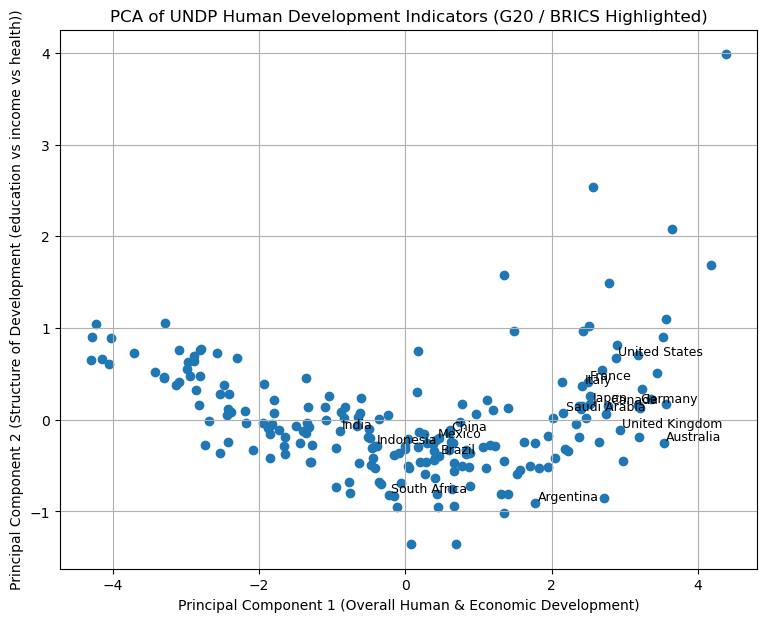

In [19]:
# -----------------------------
# Step 4: Plot with labels
# -----------------------------
plt.figure(figsize=(9, 7))
plt.scatter(pca_df['PC1'], pca_df['PC2'])

# Label selected countries only
label_countries = [
    "United States", "China", "Japan", "Germany", "India",
    "United Kingdom", "France", "Italy", "Canada", "South Korea",
    "Australia", "Brazil", "Mexico", "Indonesia", "Saudi Arabia",
    "Turkey", "Argentina", "South Africa", "Russia", "Iraq", "Tajikistan", "Tuvalu", "Bangladesh", "India", "El Salvador", "Equatorial Guinea",
    "Palestine State of", "Cabo Verde", "Namibia", "Guatemala"

]

for _, row in pca_df.iterrows():
    if row['Country'] in label_countries:
        plt.text(
            row['PC1'] + 0.03,
            row['PC2'] + 0.03,
            row['Country'],
            fontsize=9
        )

plt.xlabel("Principal Component 1 (Overall Human & Economic Development)")
plt.ylabel("Principal Component 2 (Structure of Development (education vs income vs health))")
plt.title("PCA of UNDP Human Development Indicators (G20 / BRICS Highlighted)")
plt.grid(True)
plt.show()

